<a href="https://colab.research.google.com/github/hbbspace/PVCK_2024/blob/main/Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum – Thresholding, Segmentasi Sederhana

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.


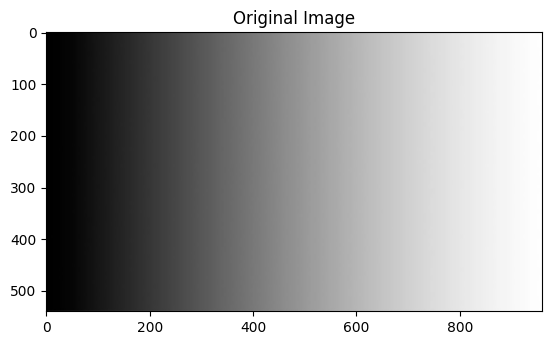

In [4]:
# Membaca gambar
gradient_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/gradient.jpg')

# Menampilkan gambar asli
plt.imshow(gradient_image, cmap='gray')
plt.title('Original Image')
plt.show()

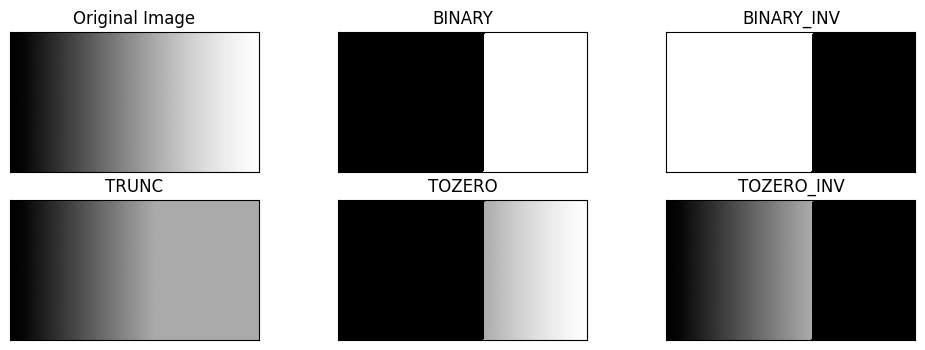

In [5]:
# Fungsi manual thresholding
def manual_threshold_binary(image, threshold=170):
    result = np.zeros_like(image)
    result[image > threshold] = 255
    result[image <= threshold] = 0
    return result

def manual_threshold_binary_inv(image, threshold=170):
    result = np.zeros_like(image)
    result[image > threshold] = 0
    result[image <= threshold] = 255
    return result

def manual_threshold_trunc(image, threshold=170):
    result = np.copy(image)
    result[image > threshold] = threshold
    return result

def manual_threshold_tozero(image, threshold=170):
    result = np.zeros_like(image)
    result[image > threshold] = image[image > threshold]
    return result

def manual_threshold_tozero_inv(image, threshold=170):
    result = np.copy(image)
    result[image > threshold] = 0
    return result

# Thresholding manual
thresh1_manual = manual_threshold_binary(gradient_image, 170)
thresh2_manual = manual_threshold_binary_inv(gradient_image, 170)
thresh3_manual = manual_threshold_trunc(gradient_image, 170)
thresh4_manual = manual_threshold_tozero(gradient_image, 170)
thresh5_manual = manual_threshold_tozero_inv(gradient_image, 170)

# Menampilkan hasil thresholding
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient_image, thresh1_manual, thresh2_manual, thresh3_manual, thresh4_manual, thresh5_manual]

plt.figure(figsize=(12, 4))
for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

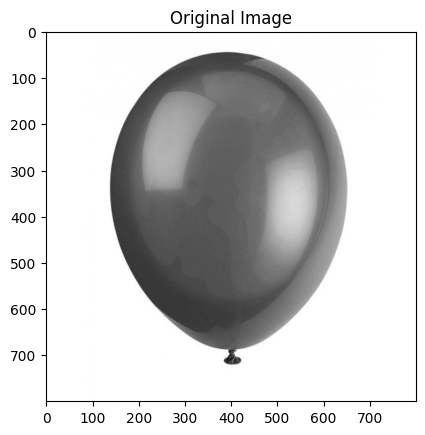

In [6]:
# Membaca gambar
balloon_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/balloon.jpg')
balloon_image = cv.cvtColor(balloon_image, cv.COLOR_BGR2GRAY)

# Menampilkan gambar asli
plt.imshow(balloon_image, cmap='gray')
plt.title('Original Image')
plt.show()

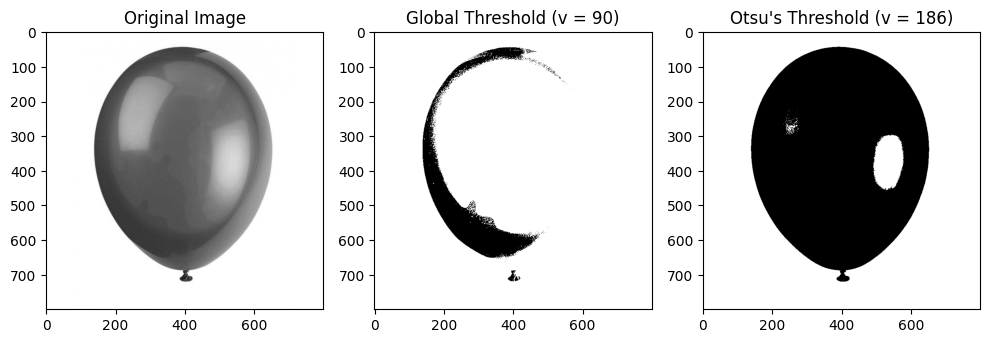

In [7]:
# Fungsi untuk menghitung histogram secara manual
def calculate_histogram(image):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1
    return histogram

# Fungsi untuk menerapkan Otsu Thresholding secara manual
def manual_otsu_threshold(image):
    # Langkah 1: Hitung histogram
    histogram = calculate_histogram(image)

    # Langkah 2: Normalisasi histogram untuk mendapatkan probabilitas
    total_pixels = image.shape[0] * image.shape[1]
    probability = histogram / total_pixels

    # Langkah 3: Inisialisasi variabel
    current_max, threshold = 0, 0
    sum_total, sum_foreground = 0, 0
    weight_background, weight_foreground = 0, 0

    # Jumlah total intensitas piksel (untuk perhitungan selanjutnya)
    for i in range(256):
        sum_total += i * probability[i]

    # Langkah 4: Iterasi untuk semua kemungkinan nilai threshold (0 hingga 255)
    for t in range(256):
        weight_background += probability[t]
        weight_foreground = 1 - weight_background

        if weight_background == 0 or weight_foreground == 0:
            continue

        sum_foreground += t * probability[t]

        # Rata-rata kelas latar belakang dan latar depan
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Variansi antar kelas
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Find the threshold with the maximum between-class variance
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = t

    # Langkah 5: Terapkan threshold ke gambar
    result = np.zeros_like(image)
    result[image > 186] = 255
    result[image <= 186] = 0

    return result, 186

# Terapkan Otsu thresholding secara manual
otsu_result, otsu_threshold = manual_otsu_threshold(balloon_image)

# Terapkan threshold global untuk perbandingan (menggunakan threshold = 90)
ret, global_thresh = cv.threshold(balloon_image, 90, 255, cv.THRESH_BINARY)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(balloon_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Threshold (v = 90)')

plt.subplot(1, 3, 3)
plt.imshow(otsu_result, cmap='gray')
plt.title(f"Otsu's Threshold (v = {otsu_threshold})")

plt.tight_layout()
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
  * Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  * Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
  * Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

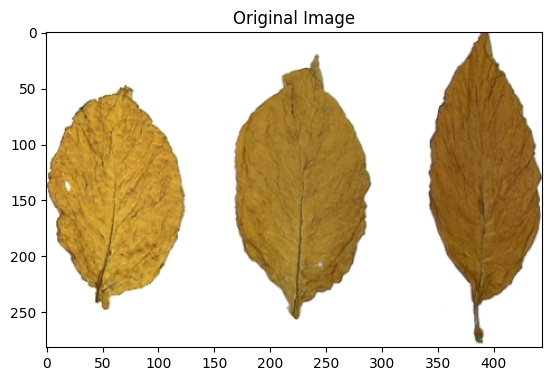

In [8]:
# Membaca gambar
tobacco_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/tobacco.jpg')
image_rgb = cv.cvtColor(tobacco_img, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

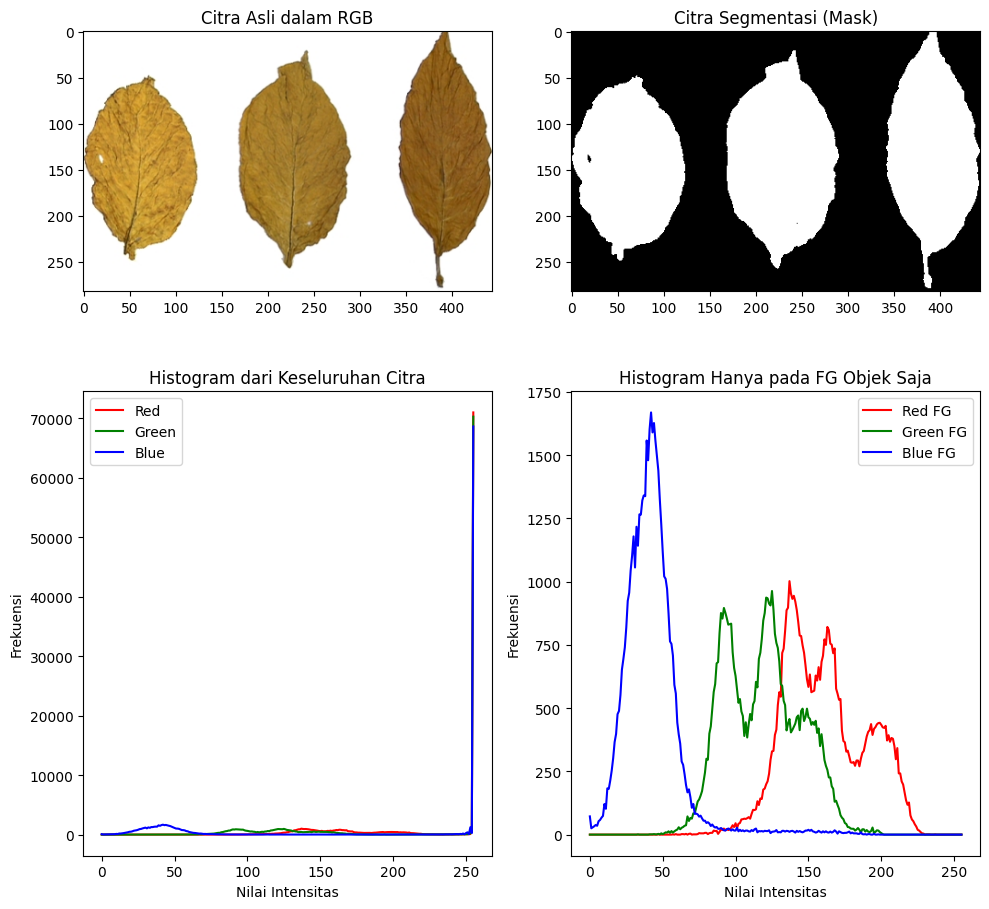

In [9]:
# Langkah 2: Membuat mask untuk menandai foreground
# Thresholding untuk menciptakan mask (foreground = putih, background = hitam)
gray_image = cv.cvtColor(tobacco_img, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

# Membalik mask sehingga foreground menjadi putih (255) dan background menjadi hitam (0)
mask = cv.bitwise_not(mask)  # Membalik mask

# Langkah 3: Hitung histogram keseluruhan citra
hist_total_b = cv.calcHist([tobacco_img], [0], None, [256], [0, 256])  # Blue
hist_total_g = cv.calcHist([tobacco_img], [1], None, [256], [0, 256])  # Green
hist_total_r = cv.calcHist([tobacco_img], [2], None, [256], [0, 256])  # Red

# Langkah 4: Hitung histogram hanya pada foreground (menggunakan mask)
# Menggunakan mask untuk menghitung histogram RGB
hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])  # Channel 0 untuk Red
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])  # Channel 1 untuk Green
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])  # Channel 2 untuk Blue

# Langkah 5: Tampilkan gambar dan histogram
plt.figure(figsize=(10, 10))

# Tampilkan citra asli dan citra segmentasi
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask)')

# Tampilkan histogram keseluruhan citra
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

# Tampilkan histogram hanya pada FG objek saja
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

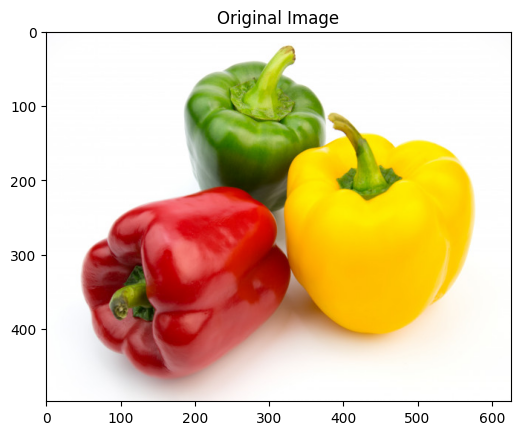

In [10]:
# Membaca gambar
peppers_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/peppers.jpg')
peppers_img = cv.cvtColor(peppers_img, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.imshow(peppers_img)
plt.title('Original Image')
plt.show()

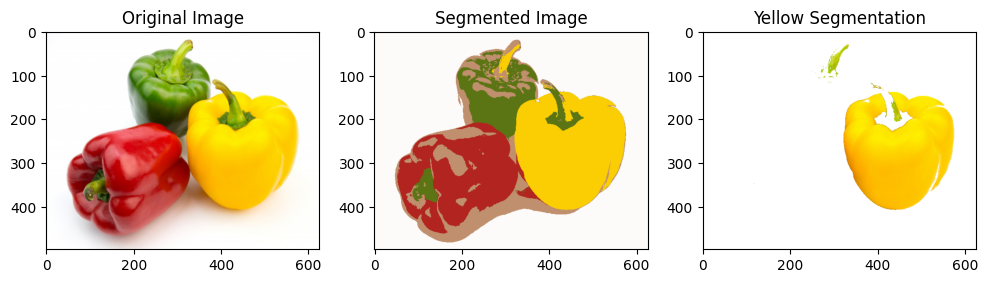

In [11]:
# Menampilkan gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(peppers_img)
plt.title('Original Image')
plt.axis('on')

# Langkah 2: Mengubah gambar menjadi data yang sesuai untuk K-Means
pixel_values = peppers_img.reshape((-1, 3))  # Ubah gambar menjadi array 2D
pixel_values = np.float32(pixel_values)  # Ubah ke tipe data float

# Langkah 3: Tentukan k dan lakukan K-Means clustering
k = 5  # Jumlah cluster yang diinginkan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Mengonversi label ke warna
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(peppers_img.shape)  # Ubah kembali ke bentuk asli

# Langkah 5: Membuat mask untuk warna kuning
# Ubah segmented image ke format HSV untuk segmentasi warna
hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

# Definisikan batas untuk warna kuning dalam HSV
lower_yellow = np.array([20, 100, 100])  # Batas bawah warna kuning
upper_yellow = np.array([30, 255, 255])  # Batas atas warna kuning

# Membuat mask
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Langkah 6: Terapkan mask pada gambar asli
result = cv.bitwise_and(peppers_img, peppers_img, mask=yellow_mask)

# Langkah 7: Mengubah latar belakang menjadi putih
# Membuat latar belakang putih
background = np.full(peppers_img.shape, 255, dtype=np.uint8)  # Buat gambar putih

# Menggabungkan gambar hasil dengan latar belakang putih
result_with_white_bg = np.where(yellow_mask[:, :, np.newaxis] == 255, result, background)

# Menampilkan hasil segmentasi
plt.subplot(1, 3, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(result_with_white_bg)
plt.title('Yellow Segmentation')
plt.axis('on')

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.


* Salah satu tantangan utama adalah pemilihan ruang warna yang tepat untuk segmentasi. Dalam banyak kasus, ruang warna RGB tidak selalu optimal untuk memisahkan warna tertentu, karena warna dalam RGB dapat memiliki nilai yang mirip dengan latar belakang atau warna lainnya. Misalnya, warna kuning dalam gambar mungkin memiliki nuansa atau saturasi yang berbeda, yang dapat menyebabkan variasi dalam hasil segmentasi. Oleh karena itu, seringkali lebih efektif untuk mengonversi gambar ke ruang warna lain, seperti HSV (Hue, Saturation, Value), di mana komponen warna dipisahkan dengan lebih jelas.

* Selain itu, kendala lain muncul dari pemilihan batasan (threshold) untuk warna yang ingin diekstrak. Jika batasan terlalu ketat, mungkin tidak semua variasi warna yang diinginkan akan terdeteksi, sedangkan jika terlalu longgar, dapat mengakibatkan pengambilan warna yang tidak diinginkan. Ini dapat membuat hasil akhir tidak akurat, karena objek yang seharusnya tersegmentasi dapat tersisih atau sebaliknya, latar belakang yang tidak relevan dapat ikut terambil. Faktor lain yang berkontribusi adalah pencahayaan dalam gambar; perubahan pencahayaan dapat mempengaruhi cara warna muncul dalam gambar, sehingga perlu penyesuaian lebih lanjut pada batasan warna.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

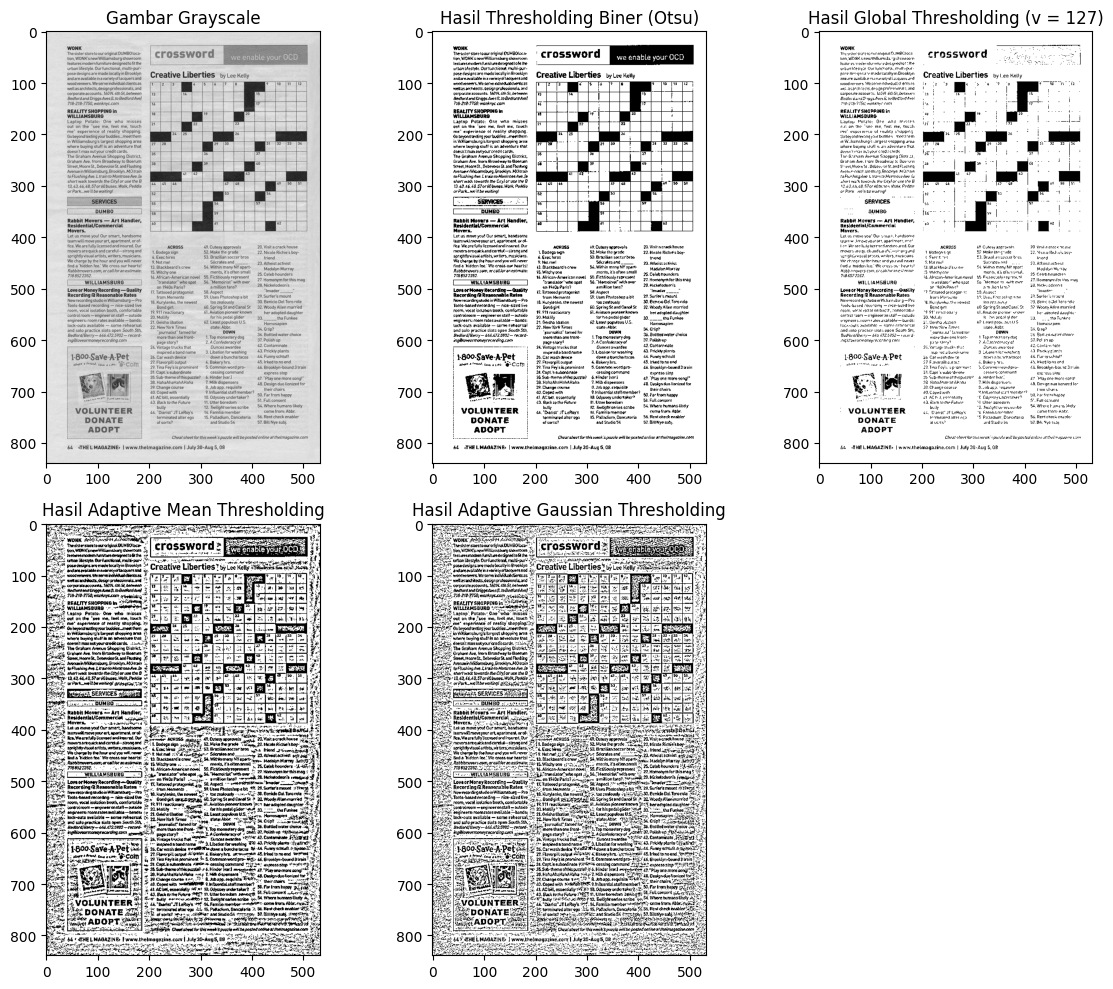

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

# Langkah 1: Membaca gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/crossword.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Langkah 2: Menggunakan Otsu's thresholding
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Langkah 3: Menggunakan Global Thresholding
ret_global, binary_threshold_global = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

# Langkah 4: Menggunakan Adaptive Mean Thresholding
adaptive_mean = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                     cv.THRESH_BINARY, 11, 2)

# Langkah 5: Menggunakan Adaptive Gaussian Thresholding
adaptive_gaussian = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv.THRESH_BINARY, 11, 2)

# Langkah 6: Menampilkan hasil
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('on')

plt.subplot(2, 3, 2)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('on')

plt.subplot(2, 3, 3)
plt.imshow(binary_threshold_global, cmap='gray')
plt.title('Hasil Global Thresholding (v = 127)')
plt.axis('on')

plt.subplot(2, 3, 4)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Hasil Adaptive Mean Thresholding')
plt.axis('on')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Hasil Adaptive Gaussian Thresholding')
plt.axis('on')

plt.tight_layout()
plt.show()


  * Jika dilihat dari beberapa percobaan dan hasil di atas, maka menurut saya hasil thresholding terbaik adalah ketika menggunakan  Otsu's thresholding. Dimana gambar yang dihasilkan jelas dan tidak terdapat noise yang mengganggu.

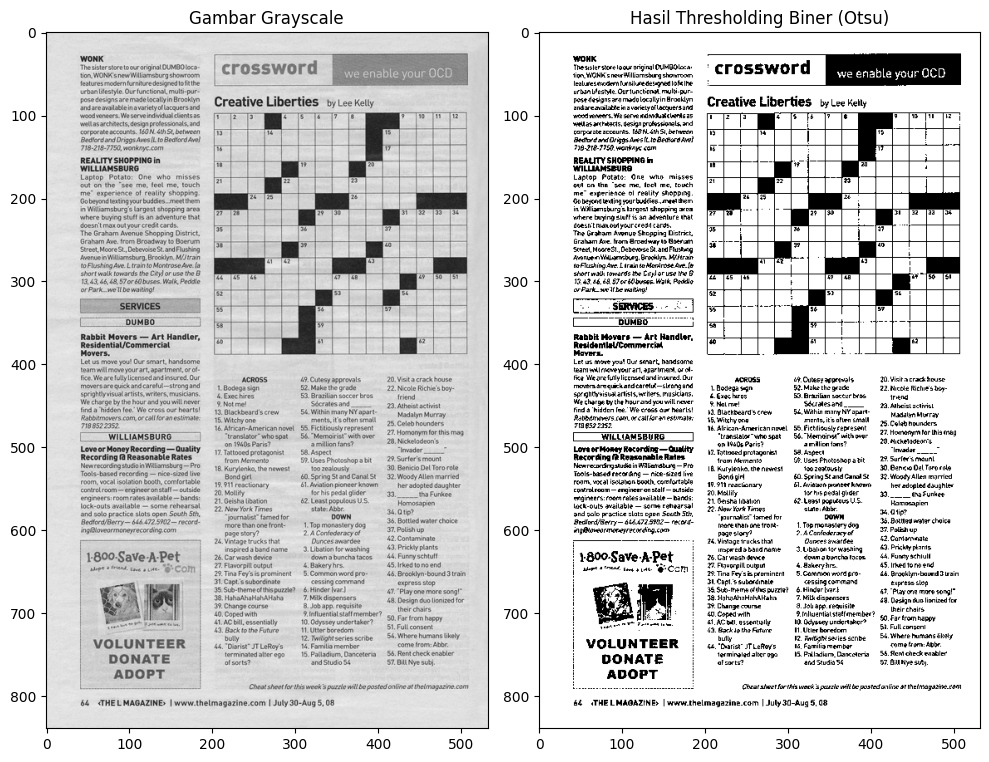

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('on')

plt.tight_layout()
plt.show()